In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

TOTAL_DATASET_SIZE = 10887
TRAIN_SIZE = 10000 #Total dataset size is 10887
TEST_SIZE = TOTAL_DATASET_SIZE - TRAIN_SIZE

HOURS_IN_DAY = 24
START_YEAR = 2011
DAYS_IN_YEAR = 365
MONTH_DAYS = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
MONTHS_IN_YEAR = 12

In [2]:
def get_total_day_count(datetime):
    date,time = datetime.split(' ')
    year,month,day_of_month = date.split('-') #['yyyy', 'mm', 'dd']
    time_split = time.split(':') #['hh', 'mm', 'ss']
    day_count = (int(year) - START_YEAR)*DAYS_IN_YEAR + get_day_of_year(year,month,day_of_month)
    return day_count

def datetime_to_total_hours(datetime):
    date,time = datetime.split(' ')
    year,month,day_of_month = date.split('-') #['yyyy', 'mm', 'dd']
    time_split = time.split(':') #['hh', 'mm', 'ss']
    cont_time = (int(year) - START_YEAR)*DAYS_IN_YEAR*HOURS_IN_DAY + get_day_of_year(year,month,day_of_month)*HOURS_IN_DAY + int(time_split[0])
    return cont_time

def get_hour(datetime):
    _, time = datetime.split(' ')
    time_split = time.split(':')  # ['hh', 'mm', 'ss']
    return int(time_split[0])

def get_month(datetime):
    date, _ = datetime.split(' ')
    _,month,_ = date.split('-') #['yyyy', 'mm', 'dd']
    return int(month)

def get_day_of_month(datetime):
    date, _ = datetime.split(' ')
    _,_,day_of_month = date.split('-') #['yyyy', 'mm', 'dd']
    return int(day_of_month)

def get_day_of_year(year,month,day_of_month):
    day_count = 0
    if year == '2012':
        MONTH_DAYS[1] = 29
    for i in range(int(month)-1):
        day_count += MONTH_DAYS[i]
    return day_count + int(day_of_month) -1

def get_day_of_week(datetime):
    total_day_count = get_total_day_count(datetime)
    day_of_week = np.mod(total_day_count+5,7) #0-Monday,6-Sunday
    day_of_week = day_of_week*31*np.pi/(6*18) #Refactoring day_of_week from 0-6 to 0-(31/18*PI) to make it possible to place days of week on circle
    return day_of_week

def get_humidity_impact(real_humidity):
    if(real_humidity >17):
        return real_humidity
    else:
        return 100-real_humidity
    
def get_month_impact(datetime):
    date, _ = datetime.split(' ')
    _,month,_ = date.split('-') #['yyyy', 'mm', 'dd']
    month=int(month)
    if month > 6 and month <= 10:
        month = 6 
    elif month > 10:
        month = 6 - (month - 10)
    return month

def get_hour_impact(datetime):
    _, time = datetime.split(' ')
    hour,_,_ = time.split(':')  # ['hh', 'mm', 'ss']
    #hours_impact = [55,33,20,10,7,20,70,210,340,190,130,150,185,180,170,180,240,390,370,270,195,145,110,75]
    return hours_impact[int(hour)]

def get_day_of_week(datetime):
    total_day_count = get_total_day_count(datetime)
    day_of_week = np.mod(total_day_count+5,7) #0-Monday,6-Sunday
    #day_of_week = day_of_week*31*np.pi/(6*18) #Refactoring day_of_week from 0-6 to 0-(31/18*PI) to make it possible to place days of week on circle
    return day_of_week

def get_year(datetime):
    date, _ = datetime.split(' ')
    year,_,_ = date.split('-') #['yyyy', 'mm', 'dd']
    return int(year)

In [3]:
df = pd.read_csv('data/train.csv')

#Adding continous time as variable because of the increasing amount of bikes over time
#Adding day count to group data of one day(avg or sum) because plotting each hour is too messy
#Consider adding day of the week
df['cont_time'] = df.datetime.apply(datetime_to_total_hours)
df['hour'] = df.datetime.apply(get_hour)
df['day'] = df.datetime.apply(get_day_of_month)
df['month'] = df.datetime.apply(get_month)
df['year'] = df.datetime.apply(get_year)
df['month2'] = df.datetime.apply(get_month_impact)
df['day_of_month'] = df.datetime.apply(get_day_of_month)
df['humidity2'] = df.humidity.apply(get_humidity_impact)
#df['day_count'] = df.datetime.apply(get_total_day_count)
#df = df.drop('datetime',1)
hours_impact = np.array(df.groupby('hour')['count'].mean())
df['hour_impact'] = df.datetime.apply(get_hour_impact)
df['day_of_week'] = df.datetime.apply(get_day_of_week)
df['check'] = df.loc[(df['workingday'] == 0) | (df['day_of_week'] < 5)].datetime.apply(lambda x: 0)
#df.head(10)

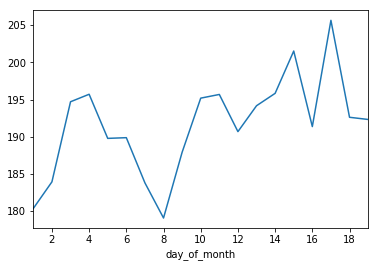

In [4]:
df.groupby('day_of_month')['count'].mean().plot()
plt.show()

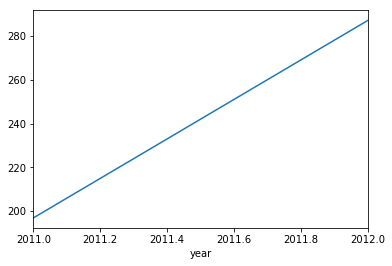

In [5]:
df.loc[df['month'] == 6].groupby('year')['count'].mean().plot()
plt.show()

(7412, 23)
24
           count  registered     casual
hour                                   
0      36.732258   29.558065   7.174194
1      16.003236   12.556634   3.446602
2       8.436066    6.334426   2.101639
3       4.892734    4.013841   0.878893
4       5.363636    4.629630   0.734007
5      24.529032   23.241935   1.287097
6     102.577419   98.296774   4.280645
7     290.690323  278.748387  11.941935
8     479.945161  457.900000  22.045161
9     242.293548  218.248387  24.045161
10    133.596774  103.387097  30.209677
11    157.019355  119.919355  37.100000
12    199.347267  158.938907  40.408360
13    197.160772  154.945338  42.215434
14    180.366559  135.684887  44.681672
15    198.627010  153.446945  45.180064
16    292.466238  244.720257  47.745981
17    529.209003  472.700965  56.508039
18    495.485531  446.070740  49.414791
19    349.282958  308.826367  40.456592
20    249.363344  218.771704  30.591640
21    184.855305  160.765273  24.090032
22    138.344051  119.0771

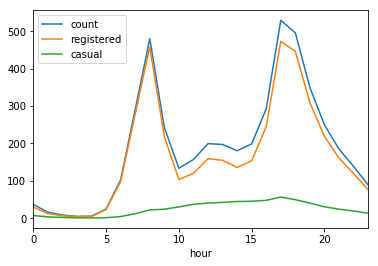

In [6]:
a = df.loc[df['workingday'] == 1]
print(a.shape)
a = a.groupby('hour')['count','registered','casual'].mean()
a.plot()
print(len(a))
print(a)
plt.show()

(1605, 23)
24
           count  registered      casual
hour                                    
0      94.298507   77.313433   16.985075
1      76.208955   61.970149   14.238806
2      58.272727   46.818182   11.454545
3      27.417910   20.925373    6.492537
4       9.223881    6.850746    2.373134
5       8.892308    6.953846    1.938462
6      17.343284   13.716418    3.626866
7      37.850746   28.955224    8.895522
8      93.298507   73.925373   19.373134
9     165.880597  122.253731   43.626866
10    256.701493  180.850746   75.850746
11    311.746269  209.850746  101.895522
12    371.208955  248.611940  122.597015
13    370.671642  238.582090  132.089552
14    365.507463  228.238806  137.268657
15    363.462687  227.746269  135.716418
16    363.522388  234.955224  128.567164
17    327.388060  216.238806  111.149254
18    278.432836  194.477612   83.955224
19    226.507463  163.791045   62.716418
20    175.358209  127.447761   47.910448
21    138.000000  102.059701   35.940299
22

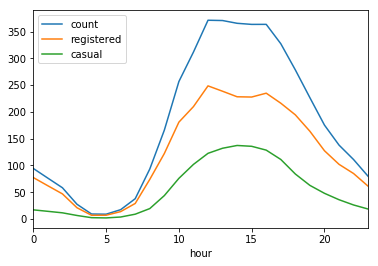

In [7]:
a = df.loc[df['day_of_week'] == 6]
print(a.shape)
a = a.groupby('hour')['count','registered','casual'].mean()
a.plot()
print(len(a))
print(a)
plt.show()

(1582, 23)
(24, 3)
           count  registered      casual
hour                                    
0      82.272727   69.575758   12.696970
1      52.560606   44.242424    8.318182
2      35.681818   29.606061    6.075758
3      16.348485   13.015152    3.333333
4       6.828125    5.281250    1.546875
5      13.575758   12.227273    1.348485
6      45.045455   40.681818    4.363636
7     117.636364  107.681818    9.954545
8     238.181818  216.909091   21.272727
9     212.363636  175.136364   37.227273
10    230.166667  167.969697   62.196970
11    288.166667  200.318182   87.848485
12    335.757576  228.818182  106.939394
13    352.393939  231.909091  120.484848
14    342.393939  216.606061  125.787879
15    346.681818  223.151515  123.530303
16    361.545455  242.863636  118.681818
17    402.378788  296.242424  106.136364
18    344.681818  262.333333   82.348485
19    266.196970  202.590909   63.606061
20    194.757576  150.439394   44.318182
21    163.954545  127.196970   36.7575

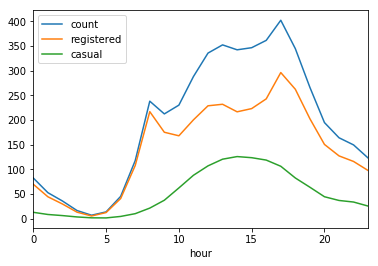

In [8]:
a = df.loc[df['day_of_week'] == 5]
print(a.shape)
a=a.groupby('hour')['count','registered','casual'].mean()
a.plot()
print(a.shape)
print(a)
plt.show()

(909, 23)
24
           count  registered      casual
hour                                    
0      82.289474   63.631579   18.657895
1      62.236842   49.263158   12.973684
2      49.189189   37.324324   11.864865
3      24.351351   16.648649    7.702703
4       8.000000    5.236842    2.763158
5      10.135135    8.081081    2.054054
6      20.289474   16.315789    3.973684
7      54.000000   44.894737    9.105263
8     115.105263   92.500000   22.605263
9     163.026316  114.526316   48.500000
10    240.052632  155.552632   84.500000
11    294.394737  184.289474  110.105263
12    338.894737  217.605263  121.289474
13    346.921053  215.052632  131.868421
14    333.026316  204.526316  128.500000
15    321.368421  200.342105  121.026316
16    324.552632  211.842105  112.710526
17    314.157895  212.210526  101.947368
18    281.657895  203.210526   78.447368
19    238.078947  173.105263   64.973684
20    183.026316  131.684211   51.342105
21    144.657895  105.421053   39.236842
22 

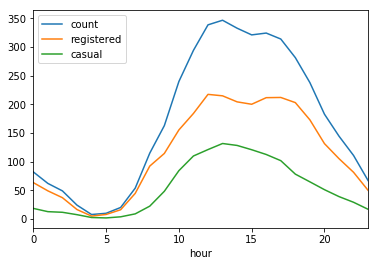

In [9]:
a = df.loc[(df['workingday'] == 0) & (df['day_of_week'] < 5)]
print(a.shape)
a =a.groupby('hour')['count','registered','casual'].mean()
a.plot()
print(len(a))
print(a)
plt.show()

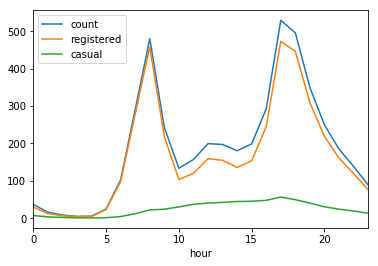

In [10]:
a = df.loc[df['workingday'] == 1].groupby('hour')['count','registered','casual'].mean().plot()
plt.show()

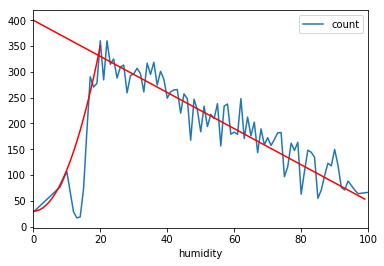

In [11]:
a = df.groupby('humidity')['count'].mean().plot()
a.legend()
lin = [400 - 3.5*i for i in range(100)]
quad = [30 + 0.8*x**2 for x in range(21)]
plt.plot(lin,color='r')
plt.plot(quad,color='r')
plt.savefig('humidity_impact')
plt.show()

In [12]:
a = df.groupby('humidity')['count'].mean()
lol = [hum_tpl for hum_tpl in zip(a.index,np.array(a))]
print(lol)
hum =[(i,0) for i in range (101)]
for hum_tpl in lol:
    hum[hum_tpl[0]] = hum_tpl[1]
#print(hum)

[(0, 28.318181818181817), (8, 77.0), (10, 107.0), (12, 29.0), (13, 17.0), (14, 19.0), (15, 73.0), (16, 185.25), (17, 290.5), (18, 270.57142857142856), (19, 277.73333333333335), (20, 360.19999999999999), (21, 284.5625), (22, 360.11111111111109), (23, 314.54054054054052), (24, 324.89189189189187), (25, 288.0625), (26, 309.23076923076923), (27, 313.16326530612247), (28, 259.42622950819674), (29, 292.49230769230769), (30, 296.26666666666665), (31, 306.91250000000002), (32, 296.5), (33, 261.05769230769232), (34, 316.74193548387098), (35, 295.05607476635515), (36, 318.58139534883719), (37, 274.34899328859058), (38, 301.13385826771656), (39, 285.44444444444446), (40, 249.04191616766468), (41, 261.04891304347825), (42, 265.1503759398496), (43, 265.63212435233163), (44, 220.01324503311258), (45, 257.3776223776224), (46, 247.89878542510121), (47, 167.63013698630138), (48, 247.03875968992247), (49, 226.03846153846155), (50, 183.87894736842105), (51, 233.49689440993788), (52, 193.98623853211009), 

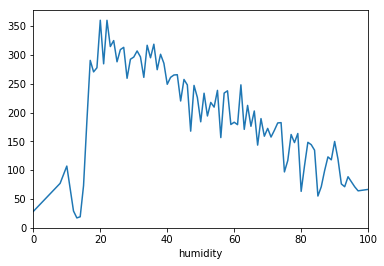

In [13]:
a = df.groupby('humidity')['count'].mean()
a.plot()
plt.savefig('myfig')
plt.show()


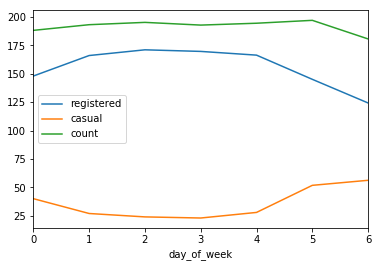

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,hour,day,month,year,month2,day_of_month,humidity2,hour_impact,day_of_week,check
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,0,1,1,2011,1,1,81,55.138462,5,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,1,1,1,2011,1,1,80,33.859031,5,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,2,1,1,2011,1,1,80,22.899554,5,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,3,1,1,2011,1,1,75,11.757506,5,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,4,1,1,2011,1,1,75,6.407240,5,0.0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,...,5,1,1,2011,1,1,75,19.767699,5,0.0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,...,6,1,1,2011,1,1,80,76.259341,5,0.0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,...,7,1,1,2011,1,1,86,213.116484,5,0.0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,...,8,1,1,2011,1,1,75,362.769231,5,0.0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,...,9,1,1,2011,1,1,76,221.780220,5,0.0


In [14]:
a = df.groupby('day_of_week')['registered','casual','count'].mean()
a.plot()
plt.show()
df.head(10)

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64


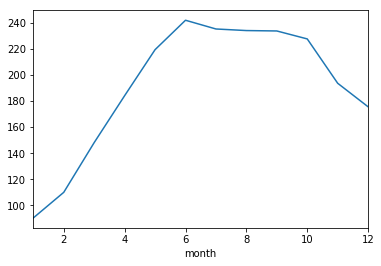

In [15]:
a = df.groupby('month')['count'].mean()
print(a)
a.plot()
plt.show()

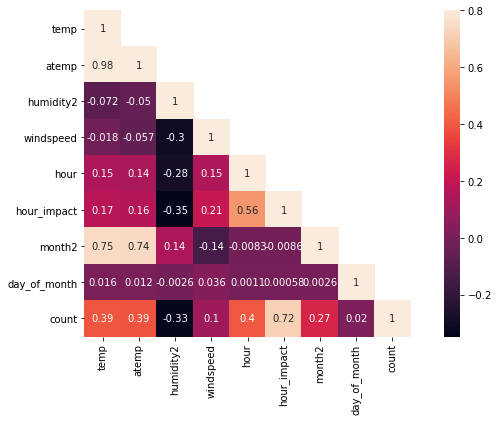

In [16]:
corrMatt = df[["temp","atemp","humidity2","windspeed",'hour','hour_impact','month2','day_of_month',"count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(12,6)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

      registered     casual       count
hour                                   
0      44.826374  10.312088   55.138462
1      27.345815   6.513216   33.859031
2      18.080357   4.819196   22.899554
3       9.076212   2.681293   11.757506
4       5.144796   1.262443    6.407240
5      18.311947   1.455752   19.767699
6      72.109890   4.149451   76.259341
7     202.202198  10.914286  213.116484
8     341.226374  21.542857  362.769231
9     190.824176  30.956044  221.780220
10    128.973626  46.118681  175.092308
11    150.621978  60.052747  210.674725
12    187.677632  68.831140  256.508772
13    183.728070  74.059211  257.787281
14    166.853070  76.589912  243.442982
15    178.269737  76.028509  254.298246
16    241.289474  75.083333  316.372807
17    393.324561  75.440789  468.765351
18    369.462719  61.396930  430.859649
19    266.203947  49.074561  315.278509
20    191.785088  36.732456  228.517544
21    144.802632  28.567982  173.370614
22    110.973684  22.603070  133.576754


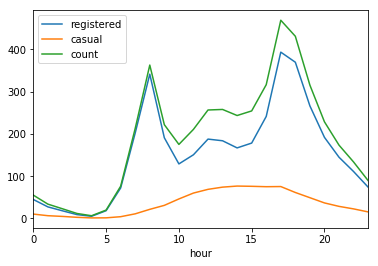

In [17]:
a = df.groupby('hour')[['registered','casual','count']].mean()

#a = np.array(df.groupby('hour')['count'].mean())
print(a)
a.plot()
plt.savefig('hour_impact')
plt.show()

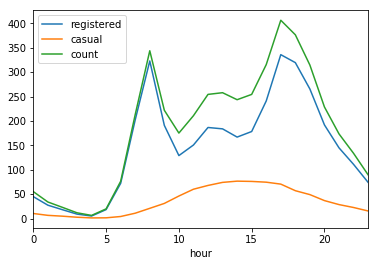

In [18]:
a = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())]
a.groupby('hour')[['registered','casual','count']].mean().plot()
#print(a.shape)
#a.head(50)
plt.show()

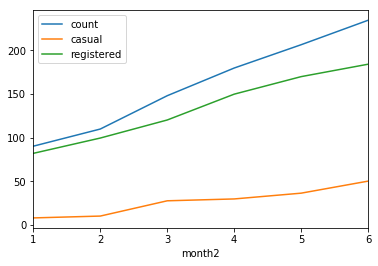

In [19]:
df.groupby('month2')[['count','casual','registered']].mean().plot()
plt.show()

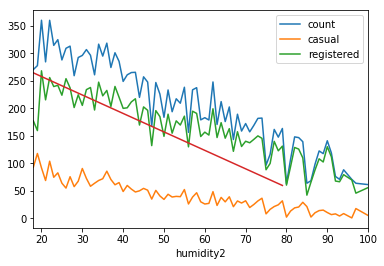

In [20]:
df.groupby('humidity2')[['count','casual','registered']].mean().plot()
lin = np.linspace(325,60,80)
plt.plot(lin)
plt.show()

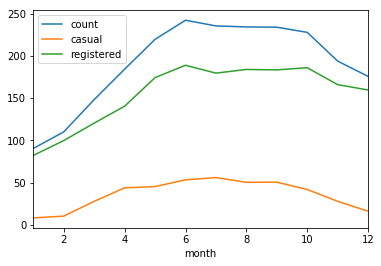

In [21]:
df.groupby('month')[['count','casual','registered']].mean().plot()
plt.show()

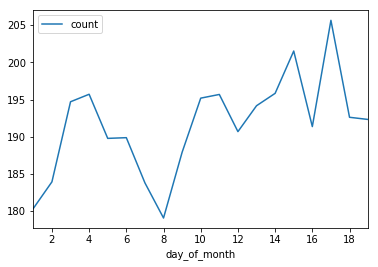

In [22]:
df.groupby('day_of_month')[['count']].mean().plot()
plt.show()

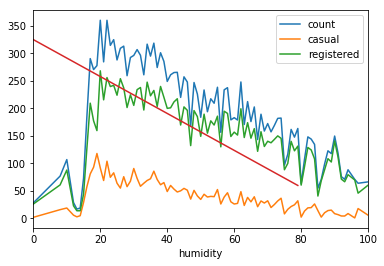

In [23]:
df.groupby('humidity')[['count','casual','registered']].mean().plot()
lin = np.linspace(325,60,80)
plt.plot(lin)
plt.show()

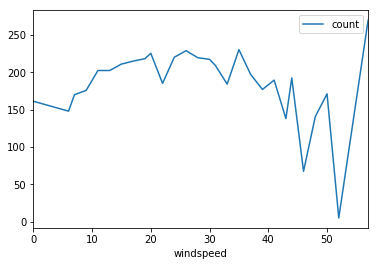

In [24]:
df.groupby('windspeed')[['count']].mean().plot()
plt.show()

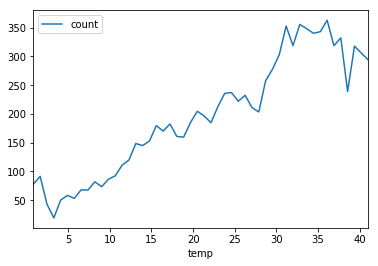

In [25]:
df.groupby('temp')[['count']].mean().plot()
plt.show()

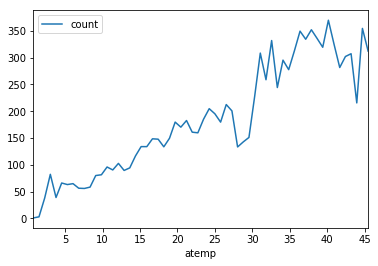

In [26]:
df.groupby('atemp')[['count']].mean().plot()
plt.show()

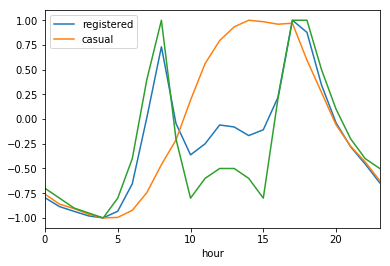

In [27]:
#df['hour3'] = df.hour.apply(lambda x: x+24 if x < 5 else x)
df['registered'] = (df['registered'] - df['registered'].min() - (df['registered'].max() - df['registered'].min())/2) / ((df['registered'].max() - df['registered'].min())/2)
df['casual'] = (df['casual'] - df['casual'].min() - (df['casual'].max() - df['casual'].min())/2) / ((df['casual'].max() - df['casual'].min())/2)
df['diff'] = df['registered']-df['casual']
#print(df['casual'].max(),df['casual'].min(),df['registered'].max(),df['registered'].min())
a = df.groupby('hour')[['registered','casual']].mean()
a = (a  - a .min() - (a .max() - a .min())/2) / ((a .max() - a .min())/2)
a.plot()
#print(a)
hours_peak = [-0.7,-0.8,-0.9,-0.95,-1,-0.8,-0.4,0.4,1,-0.2,-0.8,-0.6,-0.5,-0.5,-0.6,-0.8,0.2,1,1,0.5,0.1,-0.2,-0.4,-0.5,-0.6]
plt.plot(hours_peak)
plt.show()

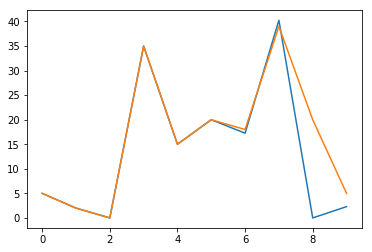

In [28]:
points = [5,2,0,35,15,20,18,39,20,5]
points2 = [5,2,0,35,15,20,18,39,20,5]
for i,p in enumerate(points):
    points2[i] = p
    if i > 5:
        points2[i] = points[5-(i-5)]*1.15
plt.plot(points2)
plt.plot(points)


plt.show()

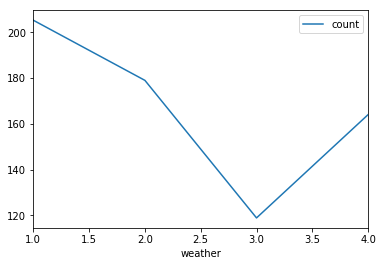

In [29]:
df.groupby('weather')[['count']].mean().plot()
plt.show()

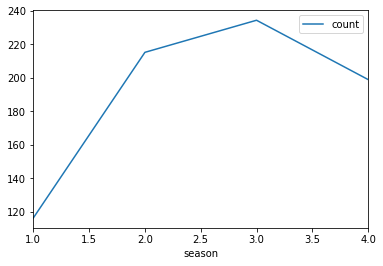

In [30]:
df.groupby('season')[['count']].mean().plot()
plt.show()

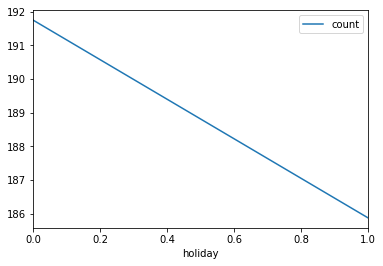

In [31]:
df.groupby('holiday')[['count']].mean().plot()
plt.show()